#Лабораторная работа по курсу

In [270]:
# заранее импортируем основные модули
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#1. Загружаем данные

In [271]:
# скачиваем данные
!wget 'https://archive.ics.uci.edu/static/public/40/flags.zip'

--2024-12-03 11:16:47--  https://archive.ics.uci.edu/static/public/40/flags.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘flags.zip.1’

flags.zip.1             [ <=>                ]   5.72K  --.-KB/s    in 0s      

2024-12-03 11:16:47 (86.1 MB/s) - ‘flags.zip.1’ saved [5862]



In [272]:
import zipfile

# Путь к zip-архиву
archive_path = '/content/flags.zip'

# Распаковываем zip-архив
with zipfile.ZipFile(archive_path, 'r') as zip_ref:
    zip_ref.extractall()

In [273]:
cols = ['name','landmass','zone','area','population','language','religion','bars','stripes',
       'colours','red','green','blue','gold','white','black','orange','mainhue','circles',
       'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate',
       'text','topleft','botright']

# загружаю датасет
data = pd.read_csv('/content/flag.data', header=None, names=cols)
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


#2. Анализ данных

Описание набора данных: Атрибутивная информация:

1. name: название соответствующей страны
2. landmass: 1=Северная Америка, 2=Южная Каролина.Америка, 3= Европа, 4= Африка, 4=Азия, 6= Океания
3. zone: географического квадранта, основанная на Гринвиче и экваторе, 1= Северо-запад, 2= ЮГО-восточная Азия, 3=Юго-Западная Азия, 4=Северо-Западная Азия
4. area: площадь в тысячах квадратных километров
5. population: население в миллионах
человек
6. language: язык 1=Английский, 2=Испанский, 3= Французский, 4= немецкий, 5= славянский, 6= Другие индоевропейские языки, 7= Китайский, 8= Арабский, 9= Японский/Турецкий/ финский/ мадьярский, 10= Другие
7. bars: Количество вертикальных полос на флаге
8. stripes: Количество горизонтальных полос
9. colours: Количество различных цветов на флаге
10. red: 0, если красный отсутствует, 1, если красный присутствует на флаге
11. green: такой же для зеленого
12. blue: такой же для синего
13. gold: такой же для золотого (также желтого)
14. white: такой же для белого
15. black: такой же для черного
16. orange: то же самое для оранжевого (также коричневого)
17. mainhue: основной цвет, преобладающий на флаге (тай-брейки определяются путем выбора самого верхнего оттенка, если это не удается, то самого центрального оттенка, а если это не удается, то самого левого оттенка)
18. circles: Количество кругов на флаге
19. crosses: Количество вертикальных
крестов
20. saltires: Количество диагональных крестов
21. quarters: Количество секций, разделенных на четверти
22. sunstars: Количество символов солнца или звезды
23. crescent: полумесяц 1, если присутствует символ полумесяца, иначе 0
24. triangle: треугольник 1, если присутствуют какие-либо треугольники, 0 в противном
случае
25. icon: значок 1, если присутствует неодушевленное изображение (например, лодка), в противном случае 0
26. animate: анимация 1, если одушевленное изображение (например, орел, дерево, человеческая рука) присутствует, 0 в противном
случае текст 1
27. text: если на флаге есть какие-либо буквы или надписи (например, девиз или лозунг), 0 в противном
случае
28. topleft: левый цвет в верхнем левом углу (перемещение вправо для определения тай-брейка)
29. botright: красный цвет в левом нижнем углу (перемещение влево для определения тай-брейка)

Целевая переменная: religion
0. Католик
1. Другой христианин
2. Мусульманин
3. Буддист
4. Индуист
5. Этнический
6. Марксист
7. Другие


а) Первичный разведочный анализ данных.

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [275]:
data['language'].head()

,language
0,10
1,6
2,8
3,1
4,6


In [276]:
black_list = ['name'] # имя страны не рассматриваем
categoricals = ['landmass','zone','language','mainhue','topleft','botright']
dummies = ['red','green','blue','gold','white','black','orange','crescent','triangle','icon','animate','text']
continious = ['area', 'population', 'bars', 'stripes', 'colours','circles', 'crosses', 'saltires', 'quarters', 'sunstars']
target = 'religion'

In [277]:
data[continious].describe()

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,700.046392,23.268041,0.453608,1.551546,3.463918,0.170103,0.149485,0.092784,0.149485,1.386598
std,2170.927932,91.934085,1.038339,2.328005,1.300154,0.463075,0.385387,0.290879,0.435860,4.396186
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,111.000000,4.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,471.250000,14.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,22402.000000,1008.000000,5.000000,14.000000,8.000000,4.000000,2.000000,1.000000,4.000000,50.000000


In [278]:
data[data.area == 0]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
15,Barbados,1,4,0,0,1,1,3,0,3,...,0,0,0,0,0,1,0,0,blue,blue
19,Bermuda,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,0,white,red
24,British-Virgin-Isles,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
33,Cayman-Islands,1,4,0,0,1,1,0,0,6,...,1,1,4,0,0,1,1,1,white,blue
41,Cook-Islands,6,3,0,0,1,1,0,0,4,...,1,1,15,0,0,0,0,0,white,blue
48,Dominica,1,4,0,0,1,1,0,0,6,...,0,0,10,0,0,0,1,0,green,green


In [279]:
data[data.population==0]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
12,Bahamas,1,4,19,0,1,1,0,3,3,...,0,0,0,0,1,0,0,0,blue,blue
13,Bahrain,5,1,1,0,8,2,0,0,2,...,0,0,0,0,0,0,0,0,white,red
15,Barbados,1,4,0,0,1,1,3,0,3,...,0,0,0,0,0,1,0,0,blue,blue
17,Belize,1,4,23,0,1,1,0,2,8,...,0,0,0,0,0,1,1,1,red,red
19,Bermuda,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,0,white,red
24,British-Virgin-Isles,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue


In [280]:
data[dummies].agg(['min', 'max', 'nunique', 'mean'])

,red,green,blue,gold,white,black,orange,crescent,triangle,icon,animate,text
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
nunique,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.78866,0.469072,0.510309,0.469072,0.752577,0.268041,0.134021,0.056701,0.139175,0.252577,0.201031,0.082474


In [281]:
dummies

['red',
 'green',
 'blue',
 'gold',
 'white',
 'black',
 'orange',
 'crescent',
 'triangle',
 'icon',
 'animate',
 'text']

In [282]:
data[continious]

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
0,648,16,0,3,5,0,0,0,0,1
1,29,3,0,0,3,0,0,0,0,1
2,2388,20,2,0,3,0,0,0,0,1
3,0,0,0,0,5,0,0,0,0,0
4,0,0,3,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
189,3,0,0,0,3,0,0,0,1,5
190,256,22,0,3,4,0,0,0,0,1
191,905,28,0,0,4,1,0,0,0,0
192,753,6,3,0,4,0,0,0,0,0


In [283]:
y = data[target]
y.head(2)

,religion
0,2
1,6


In [284]:
y.value_counts()

,count
religion,
1,60
0,40
2,36
5,27
6,15
3,8
4,4
7,4


In [285]:
def union_classes(x):
    if x in [3,4,7]:
        return 3
    elif x==6:
        return 5
    elif x==5:
        return 4
    else:
        return x

In [286]:
# объединим последние 3 целевых признака в 1
data['religion'] = data['religion'].apply(union_classes)

In [287]:
y = data['religion']
y.value_counts()

,count
religion,
1,60
0,40
2,36
4,27
3,16
5,15


In [288]:
X = pd.concat([data[continious], data[dummies],
               pd.get_dummies(data[categoricals])],
               axis=1
             )
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   area             194 non-null    int64
 1   population       194 non-null    int64
 2   bars             194 non-null    int64
 3   stripes          194 non-null    int64
 4   colours          194 non-null    int64
 5   circles          194 non-null    int64
 6   crosses          194 non-null    int64
 7   saltires         194 non-null    int64
 8   quarters         194 non-null    int64
 9   sunstars         194 non-null    int64
 10  red              194 non-null    int64
 11  green            194 non-null    int64
 12  blue             194 non-null    int64
 13  gold             194 non-null    int64
 14  white            194 non-null    int64
 15  black            194 non-null    int64
 16  orange           194 non-null    int64
 17  crescent         194 non-null    int64
 18  triangle  

б) Визуализируем некоторые из признаков.

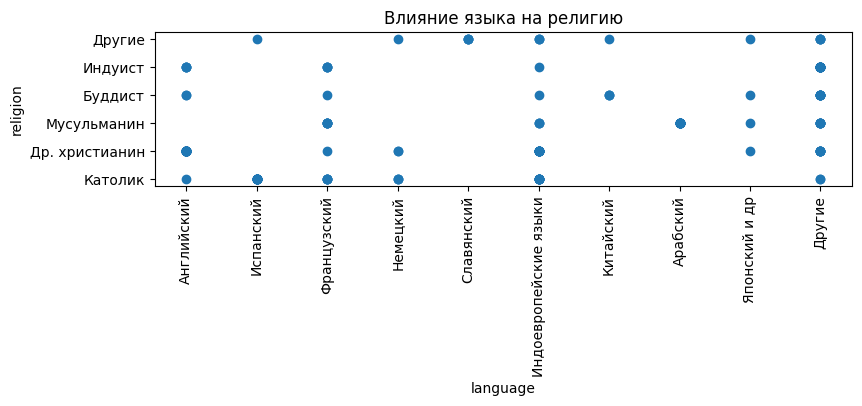

In [289]:
# влияние языка на религию
languages = ['Английский', 'Испанский', 'Французский', 'Немецкий', 'Славянский', 'Индоевропейские языки', 'Китайский', 'Арабский', 'Японский и др', 'Другие']
religions = ['Католик', 'Др. христианин', 'Мусульманин', 'Буддист', 'Индуист', 'Другие']

plt.figure(figsize=(9,2))
plt.title('Влияние языка на религию')
plt.xlabel('language')
plt.ylabel('religion')
plt.xticks(list(range(1, len(languages)+1)), languages, rotation=90)
plt.yticks(list(range(0, len(religions))), religions)

plt.scatter(data['language'], data['religion'])
plt.show()

с) Попробуем изучить флаги

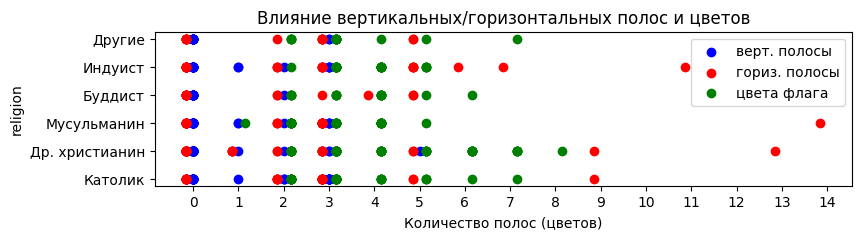

In [290]:
# количество полос и цветов
plt.figure(figsize=(9,2))
plt.title('Влияние вертикальных/горизонтальных полос и цветов')
plt.xlabel('Количество полос (цветов)')
plt.ylabel('religion')
plt.xticks(list(range(0, 20)))
plt.yticks(list(range(0, len(religions))), religions)

plt.scatter(data['bars'], data['religion'], color='b', marker='o', label='верт. полосы')
plt.scatter(data['stripes']-0.15, data['religion'], color='r', label='гориз. полосы')
plt.scatter(data['colours']+0.15, data['religion'], color='g', label='цвета флага')
plt.legend()
plt.show()

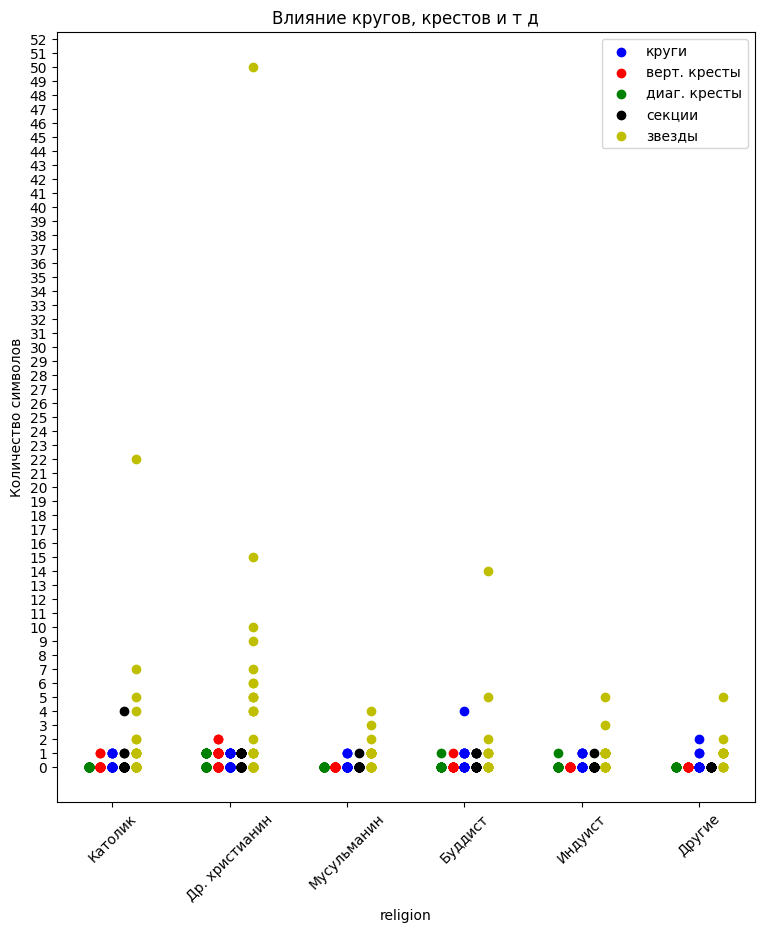

In [291]:
# количество кругов, крестов и т д
plt.figure(figsize=(9,10))
plt.title('Влияние кругов, крестов и т д')
plt.xlabel('religion')
plt.ylabel('Количество символов')
plt.xticks(list(range(0, len(religions))), religions, rotation=45)
plt.yticks(list(range(0, 60)))

plt.scatter(data['religion'], data['circles'], color='b', marker='o', label='круги')
plt.scatter(data['religion']-0.1, data['crosses'], color='r', label='верт. кресты')
plt.scatter(data['religion']-0.2, data['saltires'], color='g', label='диаг. кресты')
plt.scatter(data['religion']+0.1, data['quarters'], color='k', label='секции')
plt.scatter(data['religion']+0.2, data['sunstars'], color='y', label='звезды')
plt.legend()
plt.show()

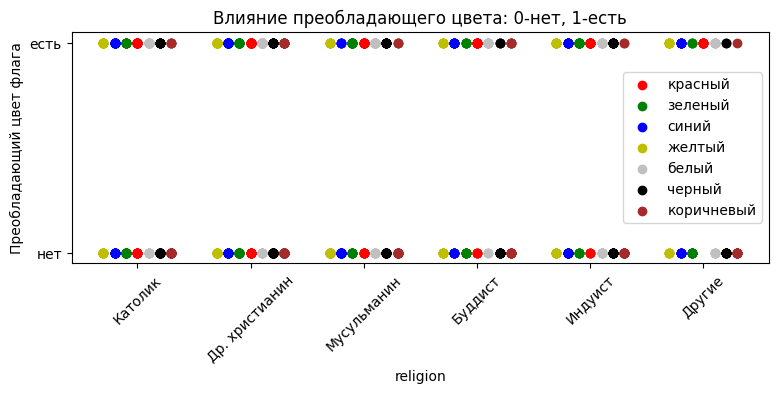

In [292]:
# преобладающие цвета флагов
plt.figure(figsize=(9,3))
plt.title('Влияние преобладающего цвета: 0-нет, 1-есть')
plt.xlabel('religion')
plt.ylabel('Преобладающий цвет флага')
plt.xticks(list(range(0, len(religions))), religions, rotation=45)
plt.yticks([0, 1], ['нет', 'есть'])

plt.scatter(data['religion'], data['red'], color='r', marker='o', label='красный')
plt.scatter(data['religion']-0.1, data['green'], color='g', marker='o', label='зеленый')
plt.scatter(data['religion']-0.2, data['blue'], color='b', marker='o', label='синий')
plt.scatter(data['religion']-0.3, data['gold'], color='y', marker='o', label='желтый')
plt.scatter(data['religion']+0.1, data['white'], color='silver', marker='o', label='белый')
plt.scatter(data['religion']+0.2, data['black'], color='k', marker='o', label='черный')
plt.scatter(data['religion']+0.3, data['orange'], color='brown', marker='o', label='коричневый')
plt.legend()
plt.show()

#3. Подготовим данные

In [293]:
y.value_counts()

,count
religion,
1,60
0,40
2,36
4,27
3,16
5,15


In [294]:
# разобрьем данные на тест и трейн
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42
                                                   )

#4. RandomForestClassifier

In [295]:
from sklearn.ensemble import RandomForestClassifier

In [296]:
# построим модель RandomForestClassifier по умолчанию
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [297]:
# обучим
rfc = rfc.fit(X_train, y_train)
rfc

RandomForestClassifier(n_jobs=-1, random_state=42)

#5. Получим предсказания с использованием metrics.classification_report.

In [298]:
from sklearn.metrics import classification_report

# получим предсказания
y_pred = rfc.predict(X_test)

# рассчитаем точности модели
rfc.score(X_test, y_test)

# посмотрим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.83      0.83      0.83        12
           2       0.43      0.43      0.43         7
           3       0.20      0.33      0.25         3
           4       1.00      0.33      0.50         6
           5       1.00      0.67      0.80         3

    accuracy                           0.64        39
   macro avg       0.68      0.58      0.59        39
weighted avg       0.71      0.64      0.64        39



Посмотрим на важность признаков

In [299]:
# напишем функцию для визуализации
def view_features(X_train, importances):

  # построим список наших признаков
  feature_list = list(X_train)
  # соберем df из feature и importance
  feature_importance = pd.DataFrame({'feature':feature_list, 'importance':importances})

  # посмотрим
  feature_importance.plot(x='feature',
                          y='importance',
                          kind='bar'
                         )
  plt.show()

  return feature_importance.sort_values(by='importance', ascending=False).values

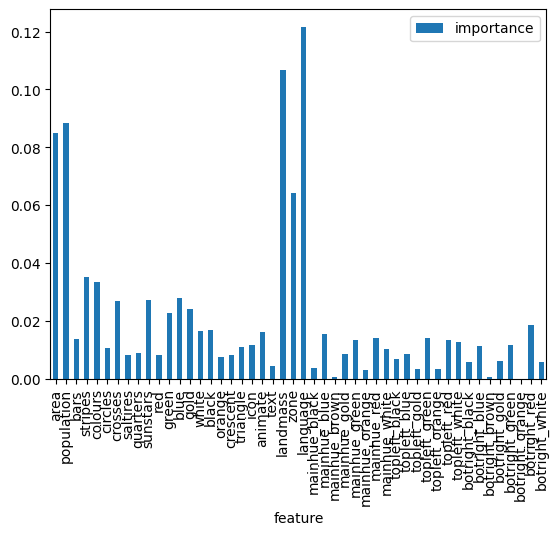

array([['language', 0.12159821779628578],
       ['landmass', 0.10675150456783959],
       ['population', 0.08851644369855782],
       ['area', 0.08487249743648023],
       ['zone', 0.06437885410360517],
       ['stripes', 0.03521979911877855],
       ['colours', 0.033551655878879094],
       ['blue', 0.028062965834685993],
       ['sunstars', 0.027320289268176867],
       ['crosses', 0.02706602720726421],
       ['gold', 0.024004208606424462],
       ['green', 0.02296200815935155],
       ['botright_red', 0.018681888184789896],
       ['black', 0.016752060754467453],
       ['white', 0.016514262462272576],
       ['animate', 0.016103245043223854],
       ['mainhue_blue', 0.01565560753092013],
       ['mainhue_red', 0.014211929613654162],
       ['topleft_green', 0.014033625325144992],
       ['bars', 0.013682030466877756],
       ['topleft_red', 0.013615607832484538],
       ['mainhue_green', 0.013414086557168319],
       ['topleft_white', 0.01289223478211907],
       ['icon', 0.01178

In [300]:
# посмотрим на важность признаков
importances = rfc.feature_importances_
view_features(X_train, importances)

#6. Построим матрицу корреляции с целевой переменной

In [301]:
# соединим наши признаки с цевым признаком
X_y = pd.concat([X, y], axis=1, ignore_index=False)
X_y.head(2)

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars,...,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white,religion
0,648,16,0,3,5,0,0,0,0,1,...,False,False,False,False,False,True,False,False,False,2
1,29,3,0,0,3,0,0,0,0,1,...,False,False,False,False,False,False,False,True,False,5


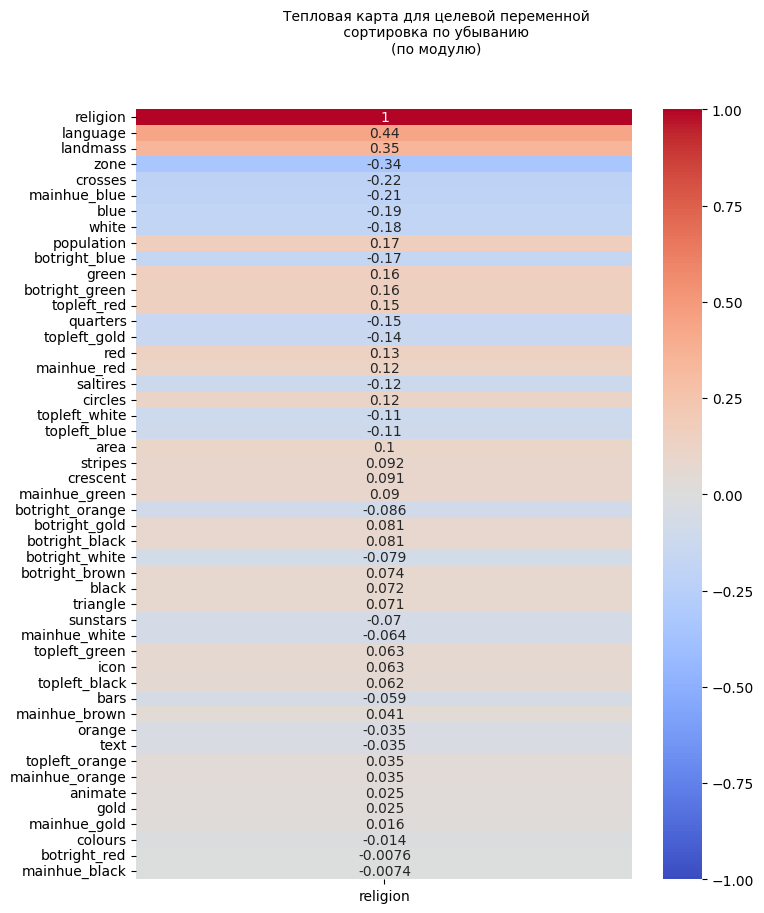

In [302]:
# построим матрицу корреляции
plt.figure(figsize=(8, 10))
sns.heatmap(X_y.corr()[[target]].sort_values(by=target, ascending=False, key=abs),
            vmin=-1,
            vmax=+1,
            annot=True,
            cmap='coolwarm'
           )

plt.suptitle('Тепловая карта для целевой переменной\n сортировка по убыванию \n(по модулю)', fontsize=10)
plt.show()

#7. Обработка выбросов.

а) Визуализация.

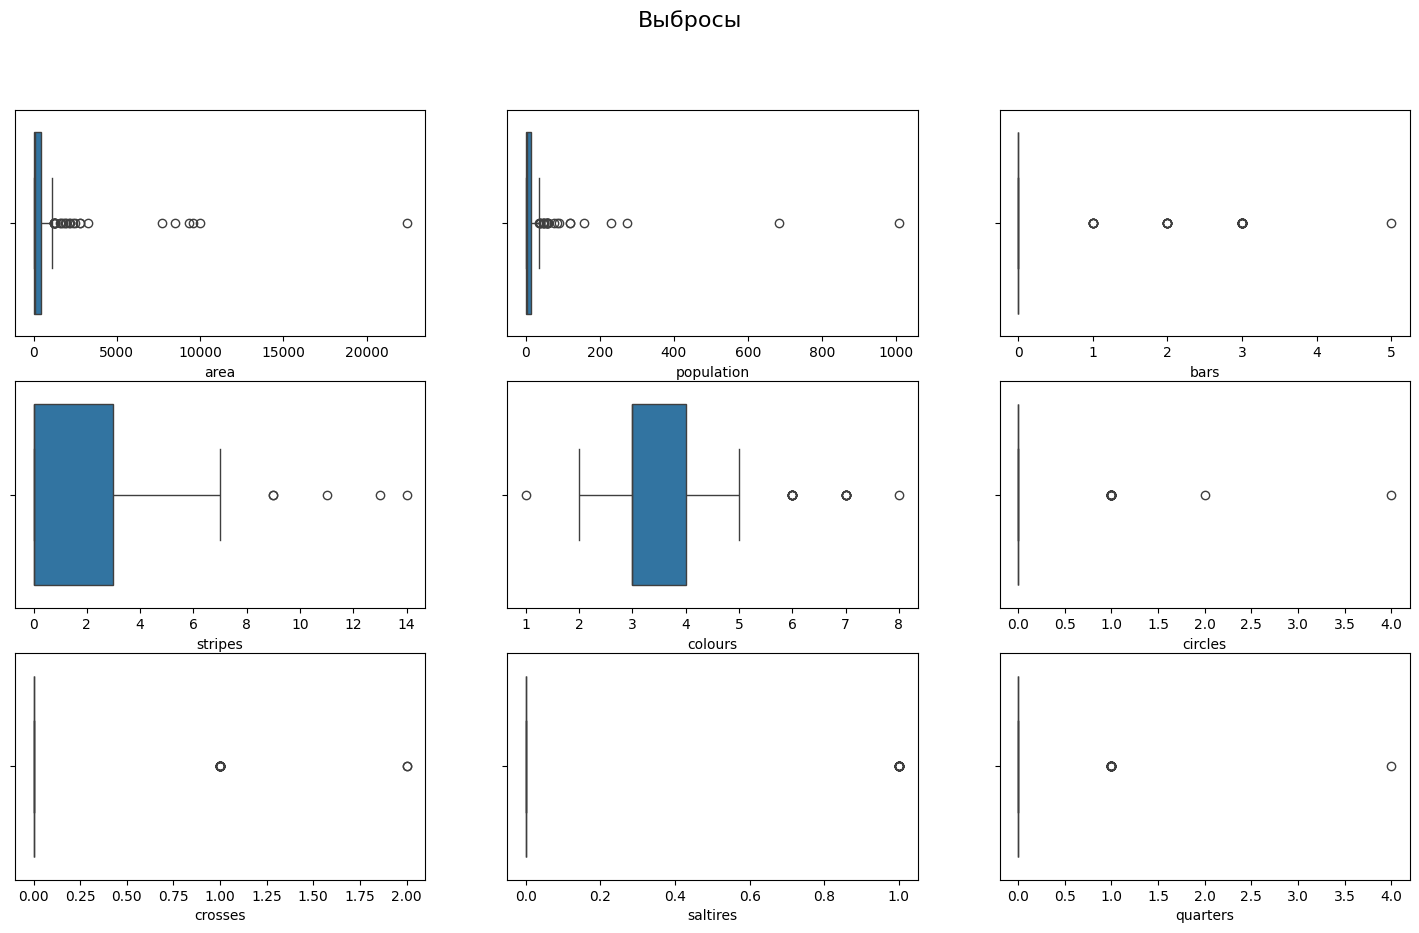

In [303]:
# посмотрим на выбросы
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
for i, ax in enumerate(axes.flat):
    sns.boxplot(ax=ax, x=data[continious].iloc[:, i])

plt.suptitle('Выбросы', fontsize=16)
plt.show()

б) Обработка выбросов.

Так как все данные взяты с официальных источников считаю целесообразныи оставить все как есть.

#8. Нормализация данных.

В п.2 данные, подлежащие нормализации сгруппированы в столбцах [continious]

In [304]:
X_train[continious].head(2)

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
183,9363,231,0,13,3,0,0,0,1,50
53,28,0,0,3,4,0,0,0,0,0


In [305]:
# используем StandardScaler для нормализации данных
scaler = StandardScaler()
X_train_ss = X_train.copy()
X_train_ss[continious] = scaler.fit_transform(X_train[continious])
X_train_ss.head()

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
183,5.656201,2.081891,-0.424714,5.183946,-0.348784,-0.360071,-0.37572,-0.315104,2.758824,10.059039,...,False,False,False,False,False,False,False,False,True,False
53,-0.369112,-0.241813,-0.424714,0.657120,0.391784,-0.360071,-0.37572,-0.315104,-0.362473,-0.306278,...,False,False,False,False,False,False,False,False,True,False
162,1.230323,-0.040627,-0.424714,0.657120,0.391784,-0.360071,-0.37572,-0.315104,-0.362473,-0.306278,...,True,False,True,False,False,False,False,False,False,False
23,5.106920,0.955246,-0.424714,-0.700928,0.391784,1.786505,-0.37572,-0.315104,-0.362473,4.254461,...,False,False,False,False,False,False,True,False,False,False
110,0.278278,-0.221695,-0.424714,-0.700928,-1.089352,-0.360071,-0.37572,-0.315104,-0.362473,-0.098972,...,False,False,False,False,False,False,True,False,False,False


In [306]:
# проверим
X_train_ss.agg(['min', 'max', 'nunique', 'mean'])

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
min,-3.871850e-01,-0.241813,-4.247139e-01,-7.009279e-01,-1.829919e+00,-3.600707e-01,-3.757195e-01,-3.151044e-01,-3.624733e-01,-3.062784e-01,...,False,False,False,False,False,False,False,False,False,False
max,6.051864e+00,9.897986,4.345623e+00,5.183946e+00,3.354056e+00,8.226232e+00,5.170617e+00,3.173551e+00,2.758824e+00,1.005904e+01,...,True,True,True,True,True,True,True,False,True,True
nunique,1.120000e+02,42.000000,5.000000e+00,1.100000e+01,8.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,1.400000e+01,...,2,2,2,2,2,2,2,1,2,2
mean,1.719055e-17,0.000000,1.862310e-17,-5.730183e-18,-1.375244e-16,-1.719055e-17,-9.168293e-17,5.157165e-17,-3.438110e-17,-5.730183e-17,...,0.290323,0.180645,0.045161,0.245161,0.012903,0.03871,0.206452,0.0,0.387097,0.064516


In [307]:
# используем MinMaxScaler для нормализации данных
scaler = MinMaxScaler()
X_train_mms = X_train.copy()
X_train_mms[continious] = scaler.fit_transform(X_train[continious])
X_train_mms.head()

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
183,0.938553,0.229167,0.0,1.000000,0.285714,0.00,0.0,0.0,1.0,1.00,...,False,False,False,False,False,False,False,False,True,False
53,0.002807,0.000000,0.0,0.230769,0.428571,0.00,0.0,0.0,0.0,0.00,...,False,False,False,False,False,False,False,False,True,False
162,0.251203,0.019841,0.0,0.230769,0.428571,0.00,0.0,0.0,0.0,0.00,...,True,False,True,False,False,False,False,False,False,False
23,0.853248,0.118056,0.0,0.000000,0.428571,0.25,0.0,0.0,0.0,0.44,...,False,False,False,False,False,False,True,False,False,False
110,0.103348,0.001984,0.0,0.000000,0.142857,0.00,0.0,0.0,0.0,0.02,...,False,False,False,False,False,False,True,False,False,False


In [308]:
# проверим
X_train_mms.agg(['min', 'max', 'nunique', 'mean'])

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,True,True,True,True,True,True,True,False,True,True
nunique,112.000000,42.000000,5.000000,11.000000,8.000000,3.000000,3.000000,2.000000,2.000000,14.000000,...,2,2,2,2,2,2,2,1,2,2
mean,0.060131,0.023848,0.089032,0.119107,0.352995,0.041935,0.067742,0.090323,0.116129,0.029548,...,0.290323,0.180645,0.045161,0.245161,0.012903,0.03871,0.206452,0.0,0.387097,0.064516


#9. RandomForestClassifier + StandardScaler/MinMaxScaler

Данные нормализованы StandardScaler

In [309]:
# построим модель RandomForestClassifier по умолчанию
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [310]:
# обучим
rfc_ss = rfc.fit(X_train_ss, y_train)
rfc_ss

RandomForestClassifier(n_jobs=-1, random_state=42)

In [311]:
# получим предсказания
y_pred = rfc_ss.predict(X_test)

# рассчитаем точности модели
rfc_ss.score(X_test, y_test)

# посмотрим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.62      0.53         8
           1       1.00      0.58      0.74        12
           2       0.57      0.57      0.57         7
           3       0.50      0.67      0.57         3
           4       0.60      0.50      0.55         6
           5       0.40      0.67      0.50         3

    accuracy                           0.59        39
   macro avg       0.59      0.60      0.58        39
weighted avg       0.67      0.59      0.60        39



Данные нормализованы MinMaxScaler

In [312]:
# построим модель RandomForestClassifier по умолчанию
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [313]:
# обучим
rfc_mms = rfc.fit(X_train_mms, y_train)
rfc_mms

RandomForestClassifier(n_jobs=-1, random_state=42)

In [314]:
# получим предсказания
y_pred = rfc_mms.predict(X_test)

# рассчитаем точности модели
rfc_mms.score(X_test, y_test)

# посмотрим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.79      0.92      0.85        12
           2       0.50      0.43      0.46         7
           3       0.50      0.67      0.57         3
           4       0.67      0.33      0.44         6
           5       0.67      0.67      0.67         3

    accuracy                           0.69        39
   macro avg       0.65      0.65      0.64        39
weighted avg       0.68      0.69      0.68        39



Далее буду использовать данные, полученыые с использованием MinMaxScaler. Т.к. они показывают более лучший результат.

#10. Частично сбалансируем нашу выборку

Используем SMOTE

In [315]:
!pip install imbalanced-learn

In [316]:
# посмотрим на целевой показатель
y.value_counts()

,count
religion,
1,60
0,40
2,36
4,27
3,16
5,15


In [317]:
y_train.value_counts()

,count
religion,
1,48
0,32
2,29
4,21
3,13
5,12


In [318]:
from imblearn.over_sampling import SMOTE

In [319]:
# частично увеличим тестовую выборку до 29
counter = {0: 32, 1: 48, 2: 29, 3: 29, 4: 29, 5: 29}

In [320]:
sm = SMOTE(
           sampling_strategy=counter, # стратегия выборки. 'auto' означает увеличение
                                      # меньшего класса до размера большинственного.
           random_state=42,           # зерно для генератора случайных чисел.
           k_neighbors=5,             # количество ближайших соседей для создания
                                      # синтетических примеров.
           n_jobs=1                   # Количество ядер для параллельной работы.
                                      # -1 означает использование всех доступных ядер.
          )

In [321]:
# получим новые данные для обучения
X_train_mms_sm, y_train_sm = sm.fit_resample(X_train_mms, y_train)
X_train_mms_sm.head()

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,0.938553,0.229167,0.0,1.000000,0.285714,0.00,0.0,0.0,1.0,1.00,...,False,False,False,False,False,False,False,False,True,False
1,0.002807,0.000000,0.0,0.230769,0.428571,0.00,0.0,0.0,0.0,0.00,...,False,False,False,False,False,False,False,False,True,False
2,0.251203,0.019841,0.0,0.230769,0.428571,0.00,0.0,0.0,0.0,0.00,...,True,False,True,False,False,False,False,False,False,False
3,0.853248,0.118056,0.0,0.000000,0.428571,0.25,0.0,0.0,0.0,0.44,...,False,False,False,False,False,False,True,False,False,False
4,0.103348,0.001984,0.0,0.000000,0.142857,0.00,0.0,0.0,0.0,0.02,...,False,False,False,False,False,False,True,False,False,False


In [322]:
# проверим
y_train_sm.value_counts()

,count
religion,
1,48
0,32
4,29
2,29
5,29
3,29


RandomForestClassifier с учетом частично сбалансированной выборки

In [323]:
# построим модель RandomForestClassifier по умолчанию
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [324]:
# обучим
rfc_mms_sm = rfc.fit(X_train_mms_sm, y_train_sm)
rfc_mms_sm

RandomForestClassifier(n_jobs=-1, random_state=42)

In [325]:
# получим предсказания
y_pred = rfc_mms_sm.predict(X_test)
# посмотрим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.86      1.00      0.92        12
           2       0.67      0.29      0.40         7
           3       0.67      0.67      0.67         3
           4       0.62      0.83      0.71         6
           5       0.67      0.67      0.67         3

    accuracy                           0.77        39
   macro avg       0.73      0.72      0.71        39
weighted avg       0.76      0.77      0.75        39



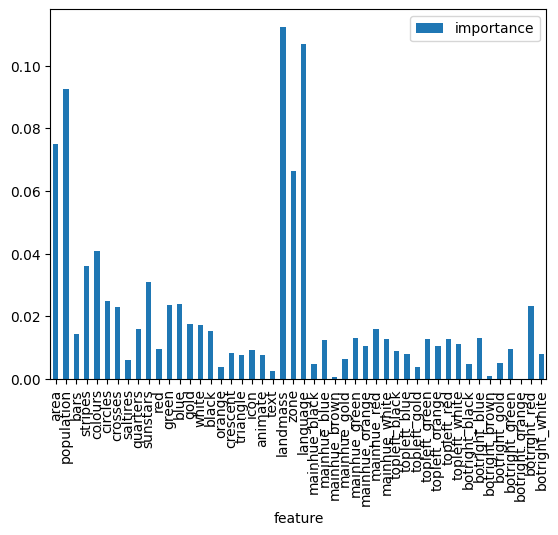

In [326]:
# посмотрим на важность признаков
importances = rfc.feature_importances_
feature_importance = view_features(X_train, importances)

In [327]:
# получает наши самые важные признаки
feature_importance[:13]

array([['landmass', 0.11232436729240153],
       ['language', 0.10696640776195929],
       ['population', 0.0926425887466809],
       ['area', 0.07493304562655843],
       ['zone', 0.06627001347784281],
       ['colours', 0.04077738848320164],
       ['stripes', 0.03592200331039532],
       ['sunstars', 0.030957089172958367],
       ['circles', 0.024890333918914678],
       ['blue', 0.023800530055351335],
       ['green', 0.02357438063298616],
       ['botright_red', 0.023205523575293787],
       ['crosses', 0.023109265495669183]], dtype=object)

#11. Определение избыточных признаков. Рандомный признак.

Проверим методику поиска избыточных параметров через рандомный признак.

Добавим рандомный признак

In [328]:
# добавим рандомный признак random_feauture
X_train_mms_sm_rn = X_train_mms_sm.copy()
X_train_mms_sm_rn['random_feauture'] = np.random.random(X_train_mms_sm.shape[0])
X_train_mms_sm_rn.head()

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars,...,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white,random_feauture
0,0.938553,0.229167,0.0,1.000000,0.285714,0.00,0.0,0.0,1.0,1.00,...,False,False,False,False,False,False,False,True,False,0.477431
1,0.002807,0.000000,0.0,0.230769,0.428571,0.00,0.0,0.0,0.0,0.00,...,False,False,False,False,False,False,False,True,False,0.221568
2,0.251203,0.019841,0.0,0.230769,0.428571,0.00,0.0,0.0,0.0,0.00,...,False,True,False,False,False,False,False,False,False,0.652616
3,0.853248,0.118056,0.0,0.000000,0.428571,0.25,0.0,0.0,0.0,0.44,...,False,False,False,False,False,True,False,False,False,0.924948
4,0.103348,0.001984,0.0,0.000000,0.142857,0.00,0.0,0.0,0.0,0.02,...,False,False,False,False,False,True,False,False,False,0.495305


In [329]:
# проверим
X_train_mms_sm_rn.agg(['min', 'max', 'nunique', 'mean'])

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars,...,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white,random_feauture
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,0.002072
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,True,True,True,True,True,True,False,True,True,0.995498
nunique,153.000000,82.000000,11.000000,39.000000,39.000000,19.000000,5.00000,6.000000,8.000000,41.000000,...,2,2,2,2,2,2,1,2,2,196.000000
mean,0.061863,0.033839,0.080007,0.119995,0.352006,0.061297,0.05606,0.082365,0.108825,0.027735,...,0.214286,0.040816,0.234694,0.010204,0.061224,0.234694,0.0,0.464286,0.086735,0.520765


In [330]:
# построим модель RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [331]:
# обучим
rfc_mms_sm_rn = rfc.fit(X_train_mms_sm_rn, y_train_sm)
rfc_mms_sm_rn

RandomForestClassifier(n_jobs=-1, random_state=42)

In [332]:
# получим метрики
score_on_train = rfc_mms_sm_rn.score(X_train_mms_sm_rn, y_train_sm)
print(f'score_on_train={score_on_train :.3f}')

score_on_train=1.000


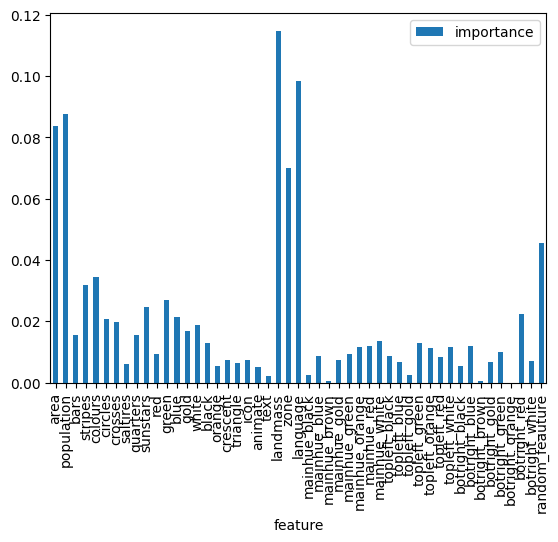

array([['landmass', 0.11484836833771049],
       ['language', 0.09845457857661324],
       ['population', 0.08750558140579343],
       ['area', 0.08357992509840732],
       ['zone', 0.0699358006418065],
       ['random_feauture', 0.045612628791654286],
       ['colours', 0.034441116831708016],
       ['stripes', 0.031687051606962155],
       ['green', 0.027011535387103994],
       ['sunstars', 0.024647833376679192]], dtype=object)

In [333]:
# посмотрим на важность признаков
importances = rfc_mms_sm_rn.feature_importances_
feature_importance = view_features(X_train_mms_sm_rn, importances)
feature_importance[:10]

In [334]:
# получает наши самые важные признаки
feature_importance[:6]

array([['landmass', 0.11484836833771049],
       ['language', 0.09845457857661324],
       ['population', 0.08750558140579343],
       ['area', 0.08357992509840732],
       ['zone', 0.0699358006418065],
       ['random_feauture', 0.045612628791654286]], dtype=object)

RandomForestClassifier с учетом найденных важных признаков

In [335]:
# список самых важных признаков
cols_1 = ['language', 'landmass', 'population', 'area', 'zone']

In [336]:
# построим модель RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [337]:
# обучим
rfc_mms_sm_с1 = rfc.fit(X_train_mms_sm[cols_1], y_train_sm)
rfc_mms_sm_с1

RandomForestClassifier(n_jobs=-1, random_state=42)

In [338]:
# получим предсказания
y_pred = rfc_mms_sm_с1.predict(X_test[cols_1])
# посмотрим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.71      0.42      0.53        12
           2       0.40      0.29      0.33         7
           3       0.00      0.00      0.00         3
           4       0.40      0.33      0.36         6
           5       0.15      0.67      0.25         3

    accuracy                           0.41        39
   macro avg       0.37      0.39      0.34        39
weighted avg       0.48      0.41      0.42        39



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#12. Отбор признаков на основании их значимости.

Отберем признаки значимость которых больше 0.02 (п.10).

In [339]:
# воспользуемся найденными ранее значениями
"""
array([['landmass', 0.11232436729240153],
       ['language', 0.10696640776195929],
       ['population', 0.0926425887466809],
       ['area', 0.07493304562655843],
       ['zone', 0.06627001347784281],
       ['colours', 0.04077738848320164],
       ['stripes', 0.03592200331039532],
       ['sunstars', 0.030957089172958367],
       ['circles', 0.024890333918914678],
       ['blue', 0.023800530055351335],
       ['green', 0.02357438063298616],
       ['botright_red', 0.023205523575293787],
       ['crosses', 0.023109265495669183]], dtype=object)
       """

"\narray([['landmass', 0.11232436729240153],\n       ['language', 0.10696640776195929],\n       ['population', 0.0926425887466809],\n       ['area', 0.07493304562655843],\n       ['zone', 0.06627001347784281],\n       ['colours', 0.04077738848320164],\n       ['stripes', 0.03592200331039532],\n       ['sunstars', 0.030957089172958367],\n       ['circles', 0.024890333918914678],\n       ['blue', 0.023800530055351335],\n       ['green', 0.02357438063298616],\n       ['botright_red', 0.023205523575293787],\n       ['crosses', 0.023109265495669183]], dtype=object)\n       "

In [340]:
# запишем найденные столбцы
cols_2 = ['landmass', 'language', 'population', 'area', 'zone', 'colours', 'stripes',
          'sunstars', 'circles', 'blue', 'green', 'botright_red', 'crosses']

In [341]:
# построим модель RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [342]:
# обучим
rfc_mms_sm_с2 = rfc.fit(X_train_mms_sm[cols_2], y_train_sm)
rfc_mms_sm_с2

RandomForestClassifier(n_jobs=-1, random_state=42)

In [343]:
# получим предсказания
y_pred = rfc_mms_sm_с2.predict(X_test[cols_2])
# посмотрим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.80      0.67      0.73        12
           2       0.83      0.71      0.77         7
           3       0.67      0.67      0.67         3
           4       0.71      0.83      0.77         6
           5       0.33      0.33      0.33         3

    accuracy                           0.67        39
   macro avg       0.64      0.64      0.64        39
weighted avg       0.69      0.67      0.67        39



Вывод:
* Возможно я ошибаюсь, но даже самые незначительные параметры, по моему мнению, оказывают существенное влияние на поиск, например, какой-нибудь редкой религии
* Поэтому их общий вклад маленький, но для конкретной религии может быть решающим
* Далее буду использовать все параметры



#13. RandomForestClassifier + GridSearchCV

In [344]:
# зададим возможные параметры
param_grid = {'max_depth': [8],
              'max_features': [None, 'sqrt', 'log2'],
              #'max_leaf_nodes': [27],
              'min_samples_leaf': [1],
              'min_samples_split': [3],
              'n_estimators': [25, 50, 75]
             }

In [345]:
# построим модель RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [346]:
# построим GridSearchCV модель
from sklearn.model_selection import GridSearchCV

rfc_grid = GridSearchCV(rfc, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

In [347]:
# обучим
rfc_grid.fit(X_train_mms_sm, y_train_sm)
rfc_grid

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [8],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1], 'min_samples_split': [3],
                         'n_estimators': [25, 50, 75]},
             verbose=True)

In [348]:
# получим наши лучшие параметры
best_params = rfc_grid.best_params_
best_params

{'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 25}

In [349]:
# получим и обучим нашу лучшую модель на меньшем числе признаков
rfc_mms_sm_best = rfc_grid.best_estimator_
rfc_mms_sm_best.fit(X_train_mms_sm, y_train_sm)
rfc_mms_sm_best

RandomForestClassifier(max_depth=8, max_features=None, min_samples_split=3,
                       n_estimators=25, n_jobs=-1, random_state=42)

In [350]:
# получим предсказания
y_pred = rfc_mms_sm_best.predict(X_test)
# посмотрим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.83      0.83      0.83        12
           2       0.75      0.43      0.55         7
           3       0.60      1.00      0.75         3
           4       0.67      0.67      0.67         6
           5       0.25      0.33      0.29         3

    accuracy                           0.69        39
   macro avg       0.64      0.67      0.64        39
weighted avg       0.71      0.69      0.69        39



# DecisionTreeClassifier

In [351]:
from sklearn import tree

In [352]:
# построим модель DecisionTreeClassifier по умолчанию
dtc = tree.DecisionTreeClassifier(random_state=42)

In [353]:
# обучим
dtc.fit(X_train_mms_sm, y_train_sm)
dtc

DecisionTreeClassifier(random_state=42)

In [354]:
# получим предсказания
y_pred = dtc.predict(X_test)
# посмотрим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.80      0.67      0.73        12
           2       0.75      0.43      0.55         7
           3       0.11      0.33      0.17         3
           4       0.00      0.00      0.00         6
           5       0.33      0.67      0.44         3

    accuracy                           0.49        39
   macro avg       0.45      0.45      0.43        39
weighted avg       0.56      0.49      0.51        39



In [355]:
# обучим
dtc.fit(X_train, y_train)
dtc

DecisionTreeClassifier(random_state=42)

In [356]:
# получим предсказания
y_pred = dtc.predict(X_test)
# посмотрим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.90      0.75      0.82        12
           2       0.50      0.43      0.46         7
           3       0.29      0.67      0.40         3
           4       0.67      0.33      0.44         6
           5       0.00      0.00      0.00         3

    accuracy                           0.59        39
   macro avg       0.49      0.51      0.47        39
weighted avg       0.61      0.59      0.58        39



In [357]:
# обучим
dtc.fit(X_train_mms, y_train)
dtc

DecisionTreeClassifier(random_state=42)

In [358]:
# получим предсказания
y_pred = dtc.predict(X_test)
# посмотрим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.88      0.61         8
           1       0.73      0.67      0.70        12
           2       1.00      0.29      0.44         7
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.20      0.33      0.25         3

    accuracy                           0.46        39
   macro avg       0.40      0.36      0.33        39
weighted avg       0.51      0.46      0.44        39



Подбор лучших параметров.

In [359]:
# зададим возможные параметры
n_samples = X_train_mms_sm.shape[0]
n_features = X_train_mms_sm.shape[1]
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 7, 9, 11],
              'max_features': [None, 'sqrt', 'auto', 'log2', 0.3, 0.5, 0.7, n_features//2, n_features//3],
              'min_samples_split': [2, 0.3, 0.5, n_samples//2, n_samples//3, n_samples//5],
              'min_samples_leaf': [1, 0.3, 0.5, n_samples//2, n_samples//3, n_samples//5]
             }

In [360]:
# построим модель DecisionTreeClassifier по умолчанию
dtc = tree.DecisionTreeClassifier(random_state=42)

In [361]:
# построим GridSearchCV модель
dtc_grid = GridSearchCV(dtc, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

In [362]:
# обучим
dtc_grid.fit(X_train_mms_sm, y_train_sm)
dtc_grid

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1800 fits failed out of a total of 16200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
882 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 7, 9, 11],
                         'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,
                                          0.5, 0.7, 24, 16],
                         'min_samples_leaf': [1, 0.3, 0.5, 98, 65, 39],
                         'min_samples_split': [2, 0.3, 0.5, 98, 65, 39]},
             verbose=True)

In [363]:
# получим наши лучшие параметры
best_params = dtc_grid.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [364]:
# получим и обучим нашу лучшую модель
dtc_mms_sm_best = rfc_grid.best_estimator_
dtc_mms_sm_best.fit(X_train_mms_sm, y_train_sm)
dtc_mms_sm_best

RandomForestClassifier(max_depth=8, max_features=None, min_samples_split=3,
                       n_estimators=25, n_jobs=-1, random_state=42)

In [365]:
# получим предсказания
y_pred = dtc_mms_sm_best.predict(X_test)
# посмотрим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.83      0.83      0.83        12
           2       0.75      0.43      0.55         7
           3       0.60      1.00      0.75         3
           4       0.67      0.67      0.67         6
           5       0.25      0.33      0.29         3

    accuracy                           0.69        39
   macro avg       0.64      0.67      0.64        39
weighted avg       0.71      0.69      0.69        39



XGBClassifier

In [366]:
!pip install xgboost

In [367]:
import xgboost
#import xgboost as xgb
print("xgboost", xgboost.__version__)

xgboost 2.1.2


In [368]:
from xgboost import XGBClassifier

In [369]:
# создадим модель XGBClassifier по умолчанию
xgb_mms_sm = XGBClassifier(num_class=6, random_state=42)
xgb_mms_sm

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

In [370]:
# обучим
xgb_mms_sm.fit(X_train_mms_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

In [371]:
# получим предсказания
y_pred = xgb_mms_sm.predict(X_test)
# посмотрим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.91      0.83      0.87        12
           2       0.80      0.57      0.67         7
           3       0.50      1.00      0.67         3
           4       0.60      0.50      0.55         6
           5       0.67      0.67      0.67         3

    accuracy                           0.72        39
   macro avg       0.69      0.72      0.69        39
weighted avg       0.74      0.72      0.72        39



Подбор оптимальных параметров.

In [372]:
!pip install scikit-optimize

In [373]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [374]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [375]:
# зададим пространство гиперпараметров
bayes_space = {'objective': ['multi:softmax'],
               # Categorical(['multi:softmax', 'multi:softprob'], name='objective')
               'booster': ['gbtree'],
               'learning_rate': Real(0.1, 0.2),
               'n_estimators': Integer(10, 100),
               'max_depth': [10, 11, 12],
               'min_child_weight': [1],
               'gamma': Real(0.1, 0.3),
               'subsample': [0.8],
               'colsample_bytree': [0.8],
               'reg_alpha': Real(0.1, 1, prior='uniform')
               #'subsample': Real(0.7, 0.8, prior='uniform'),
               #'colsample_bytree': Real(0.4, 0.7, prior='uniform')
               #'nthread': [4],
               #'scale_pos_weight': [1],
               #'seed': [27]
              }

In [376]:
# 0.74
OrderedDict([('booster', 'gbtree'),
             ('colsample_bytree', 0.5),
             ('gamma', 0.3),
             ('learning_rate', 0.14591810106106728),
             ('max_depth', 10),
             ('min_child_weight', 1),
             ('n_estimators', 86),
             ('objective', 'multi:softmax'),
             ('subsample', 0.8)])

NameError: name 'OrderedDict' is not defined

In [377]:
# зададим модель оценщика
estimators = XGBClassifier(num_class=6,
                           random_state=42,
                           n_jobs=-1
                          )

In [378]:
# построим модель BayesSearchCV
bs = BayesSearchCV(estimators,
                   search_spaces=bayes_space,
                   cv=5,
                   n_iter=50,
                   scoring='accuracy',
                   random_state=42
                  )

In [ ]:
# обучим
bs.fit(X_train_mms_sm, y_train_sm)
bs

In [ ]:
# получим наши лучшие параметры
best_params = bs.best_params_
best_params


In [ ]:
# получим и обучим нашу лучшую модель
bs_mms_sm_best = bs.best_estimator_
bs_mms_sm_best.fit(X_train_mms_sm, y_train_sm)
bs_mms_sm_best

In [ ]:
# получим предсказания
y_pred = bs_mms_sm_best.predict(X_test)
# посмотрим отчет о классификации
print(classification_report(y_test, y_pred))